# Sales Probability Calculator

This notebook calculates the probability of achieving certain sales targets in the upcoming month.  
It assumes sales follow a **normal distribution** and allows flexible probability calculations and visualization.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


In [5]:
mean_sales = float(input("Enter expected monthly sales (mean, default 80000): ") or 80000)
std_sales = float(input("Enter standard deviation of sales (default 5000): ") or 5000)

thresholds = {
    "More than 90k": 90000,
    "More than 70k": 70000,
    "Less than 73k": 73000,
    "Between 85k and 90k": (85000, 90000)
}


In [7]:
probabilities = {}

# More than 90k
probabilities["More than 90k"] = 1 - norm.cdf(thresholds["More than 90k"], mean_sales, std_sales)
# More than 70k
probabilities["More than 70k"] = 1 - norm.cdf(thresholds["More than 70k"], mean_sales, std_sales)
# Less than73
probabilities["Less than 73k"] = norm.cdf(thresholds["Less than 73k"], mean_sales, std_sales)
# Beetween 85k and 90k
low, high = thresholds["Between 85k and 90k"]
probabilities["Between 85k and 90k"] = norm.cdf(high, mean_sales, std_sales) - norm.cdf(low, mean_sales, std_sales)

for k, v in probabilities.items():
    print(f"→ Probability of '{k}': {v:.4f}")


→ Probability of 'More than 90k': 0.0228
→ Probability of 'More than 70k': 0.9772
→ Probability of 'Less than 73k': 0.0808
→ Probability of 'Between 85k and 90k': 0.1359


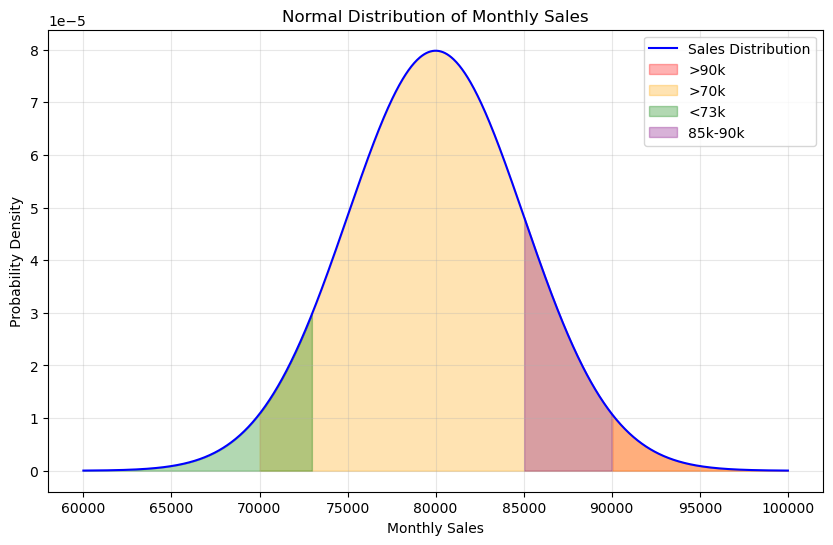

In [8]:
x = np.linspace(mean_sales - 4*std_sales, mean_sales + 4*std_sales, 1000)
y = norm.pdf(x, mean_sales, std_sales)

plt.figure(figsize=(10,6))
plt.plot(x, y, label='Sales Distribution', color='blue')

plt.fill_between(x, y, 0, where=(x>90000), color='red', alpha=0.3, label='>90k')
plt.fill_between(x, y, 0, where=(x>70000), color='orange', alpha=0.3, label='>70k')
plt.fill_between(x, y, 0, where=(x<73000), color='green', alpha=0.3, label='<73k')
plt.fill_between(x, y, 0, where=(x>=85000) & (x<=90000), color='purple', alpha=0.3, label='85k-90k')

plt.title("Normal Distribution of Monthly Sales")
plt.xlabel("Monthly Sales")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(alpha=0.3)
plt.show()
